<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Company_Reviews(Master2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [2]:
!pip install pycountry
!pip install emoji

In [3]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

import pycountry
from wordcloud import WordCloud
from collections import Counter
import emoji

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Analysis_1/

# Read CSV files into DataFrames
df1 = pd.read_csv('Freedom_Debt_Relief2.csv')
df2 = pd.read_csv('Millennium_Trust2.csv')
df3 = pd.read_csv('Advance_America2.csv')

print(df1.info(), df1.head())
print(df2.info(), df2.head())
print(df3.info(), df3.head())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Analysis_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2000 non-null   float64
 1   Experience Date  2000 non-null   object 
 2   Review Date      2000 non-null   object 
 3   Reply Date       2000 non-null   object 
 4   Exp to Review    2000 non-null   int64  
 5   Review to Reply  2000 non-null   int64  
 6   Rating           2000 non-null   int64  
 7   Countries        2000 non-null   object 
 8   Reviews          2000 non-null   object 
 9   Replies          2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB
None      Year Experience Date Review Date  Reply Date  Exp to Review  \
0  2021.0      2021-04-30  2021-04-30 

## TEXT PREPROCESSING

In [5]:
def preprocess_text_for_sentiment_analysis(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Handle emojis
    words = [emoji.demojize(word, delimiters=('', ' ')) for word in words]

    # Join tokens back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text


# Apply the preprocessing function to the "Reviews" column in each DataFrame
df1['Cleaned_Reviews'] = df1['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df2['Cleaned_Reviews'] = df2['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df3['Cleaned_Reviews'] = df3['Reviews'].apply(preprocess_text_for_sentiment_analysis)

# Display the cleaned data
print("Cleaned DataFrame 1:")
print(df1[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 2:")
print(df2[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 3:")
print(df3[['Reviews', 'Cleaned_Reviews']].head())


Cleaned DataFrame 1:
                                             Reviews  \
0  FDR OVERSIGHT I typically would give FDR a 5 s...   
1  Freedom has really helped with my debt… Freedo...   
2  Everything is following through just as… Every...   
3  Started the program owing a little… Started th...   
4  I was surprised to have a settlement so… I was...   

                                     Cleaned_Reviews  
0  fdr oversight typically would give fdr star ra...  
1  freedom really helped debt freedom really help...  
2  everything following everything following expl...  
3  started program owing little started program o...  
4  surprised settlement surprised settlement quickly  

Cleaned DataFrame 2:
                                             Reviews  \
0                  Website was easy to navigate. nan   
1                           5 star Excellent service   
2  Moving monies Getting all my investments in on...   
3  The service was excellent The service was exce...   
4  User Fr

## TEXT ITEM COUNTS

In [6]:
# Define a function to calculate and display text item counts
def calculate_and_display_text_item_counts(data, company):
    # Count the number of items in each text item
    data['Text_Item_Count'] = data['Cleaned_Reviews'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

    # Display both the text and the count of text items
    text_with_count = data[['Cleaned_Reviews', 'Text_Item_Count']]
    print(f"\nCleaned Data for {company}:")
    print(text_with_count)

    # Calculate the total number of text items across all rows
    total_text_items = data['Text_Item_Count'].sum()

    # Display the total number of text items
    print(f"Total Text Items for {company}: {total_text_items}")

# Apply the function to each DataFrame and company
calculate_and_display_text_item_counts(df1, 'Company A')
calculate_and_display_text_item_counts(df2, 'Company B')
calculate_and_display_text_item_counts(df3, 'Company C')



Cleaned Data for Company A:
                                        Cleaned_Reviews  Text_Item_Count
0     fdr oversight typically would give fdr star ra...               72
1     freedom really helped debt freedom really help...               14
2     everything following everything following expl...                7
3     started program owing little started program o...               18
4     surprised settlement surprised settlement quickly                5
...                                                 ...              ...
1995  great opportunity free debt going alot got sur...               24
1996  every time call someone every time call someon...               11
1997               sure yet sure yet still getting bill                7
1998  bit concerned understand move quicker closing ...               51
1999  cant thank freedom debt relief enough cant tha...               20

[2000 rows x 2 columns]
Total Text Items for Company A: 37377

Cleaned Data for Company B:
   

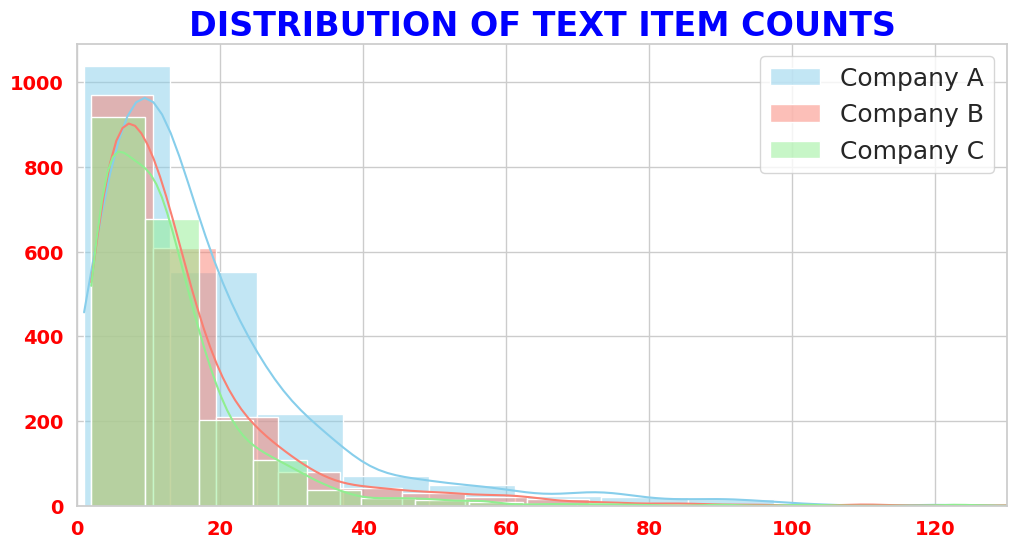

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Plot the distribution of Text_Item_Count for each company
plt.figure(figsize=(12, 6))
sns.histplot(df1['Text_Item_Count'], bins=20, kde=True, color='skyblue', label='Company A')
sns.histplot(df2['Text_Item_Count'], bins=20, kde=True, color='salmon', label='Company B')
sns.histplot(df3['Text_Item_Count'], bins=20, kde=True, color='lightgreen', label='Company C')

# Set title
plt.title('DISTRIBUTION OF TEXT ITEM COUNTS', fontsize=24, fontweight='bold', color='blue')

# Set maximum x-axis limit
plt.xlim(0, 130)

# Hide x and y labels
plt.xlabel('')
plt.ylabel('')

# Customize x and y ticks
plt.xticks(fontsize=14, fontweight='bold', color='red')
plt.yticks(fontsize=14, fontweight='bold', color='red')

# Show legend
plt.legend(fontsize=18)

# Show the plot
plt.show()


## WORDCLOUDS

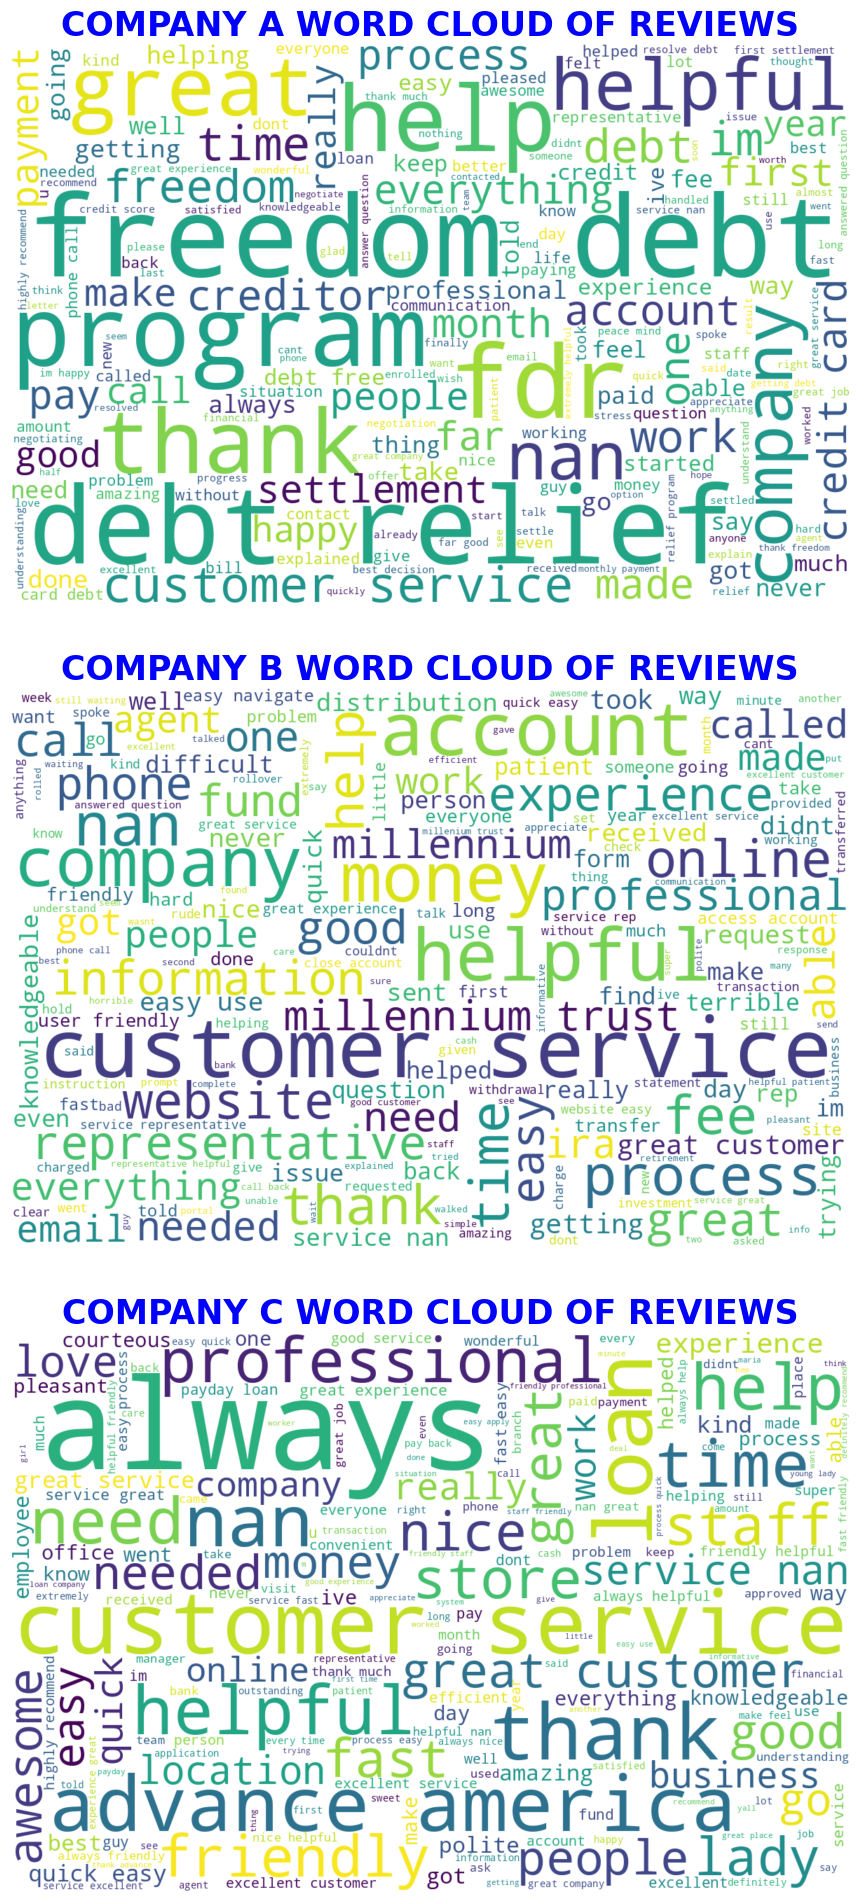

In [19]:
# Function to generate and display word cloud with a light color background
def generate_and_display_wordcloud(data, title, vertical_gap, ax):
    # Generate the word cloud with a light color background
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(' '.join(data.dropna()))

    # Sort the word cloud in descending order
    sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

    # Get the top 30 results
    top_30 = dict(list(sorted_wordcloud.items())[:30])

    # Set the subplot's title
    ax.set_title(title, fontsize=24, fontweight='bold', color='blue')

    # Add top and bottom gaps between word clouds
    plt.subplots_adjust(hspace=vertical_gap)

    # Display the word cloud on the subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Create subplots for the three DataFrames
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

# Apply the function to your DataFrames with subplots
generate_and_display_wordcloud(df1['Cleaned_Reviews'], 'COMPANY A WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[0])
generate_and_display_wordcloud(df2['Cleaned_Reviews'], 'COMPANY B WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[1])
generate_and_display_wordcloud(df3['Cleaned_Reviews'], 'COMPANY C WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[2])

# Show the subplots
plt.show()


## MOST COMMON WORDS

<ipython-input-44-eb935a04e2c3>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis')
<ipython-input-44-eb935a04e2c3>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis')
<ipython-input-44-eb935a04e2c3>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis')
<ipython-input-44-eb935a04e2c3>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results m

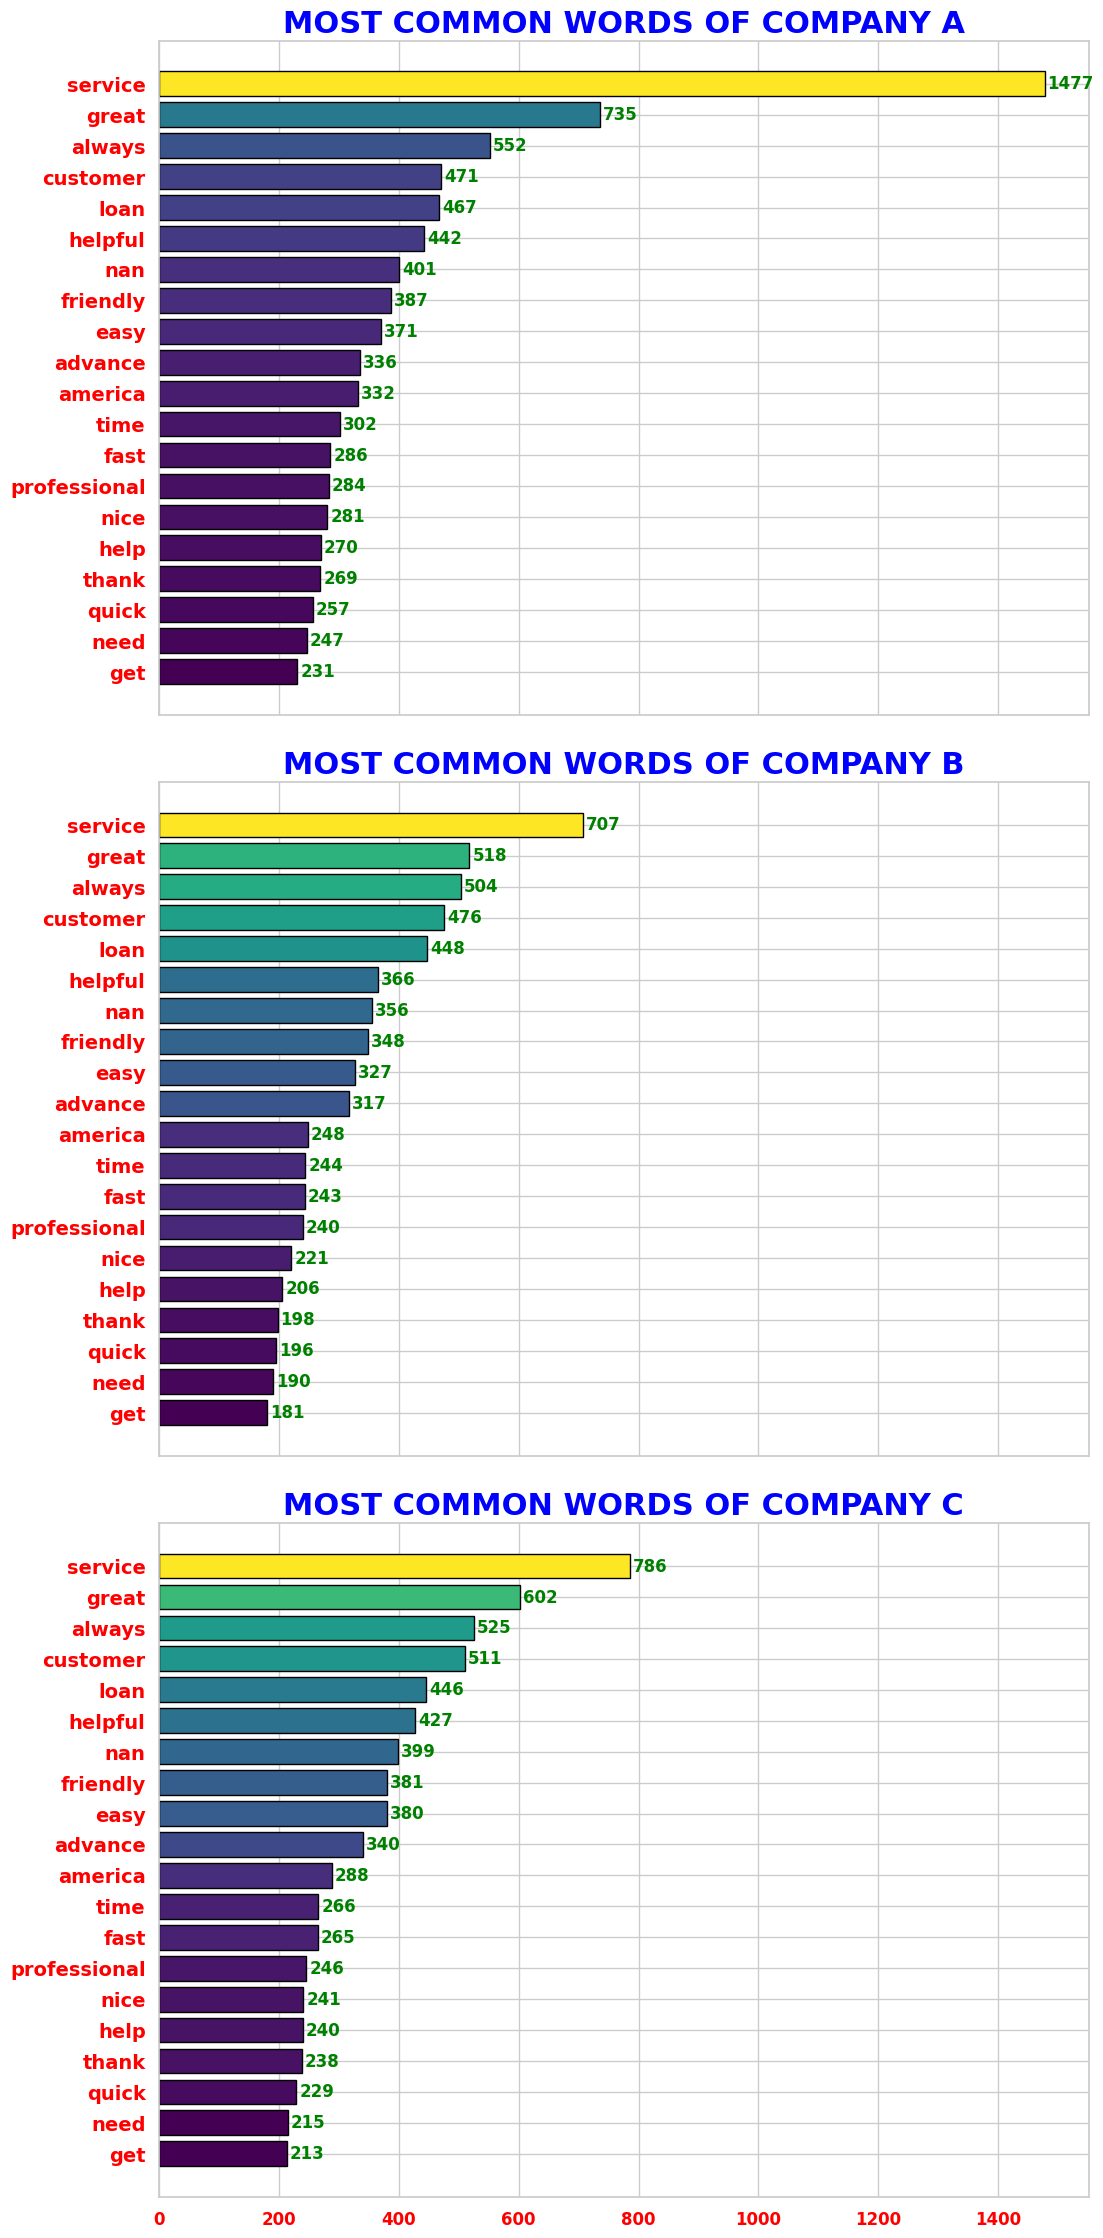

In [44]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to calculate word counts, display the top 30 words, and create a bar chart with gradient colors
def calculate_display_and_chart_word_counts(data, title, ax, top_n=20):
    # Concatenate and split the text, handling NaN values
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Sort the word counts in descending order
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Create a DataFrame for the first 30 most common words
    word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

    # Create a horizontal bar chart with gradient colors for the top 30 words
    top_words = list(sorted_word_counts.keys())[:top_n]
    top_word_counts = list(sorted_word_counts.values())[:top_n]

    # Create a color map with gradient colors
    color_map = cm.get_cmap('viridis')

    # Normalize values for gradient colors
    norm = plt.Normalize(min(top_word_counts), max(top_word_counts))

    # Add spacing between bars by adjusting the width
    bar_width = 0.8
    bars = ax.barh(top_words, top_word_counts, color=color_map(norm(top_word_counts)), edgecolor='black', height=bar_width)

    # Add data values on each bar with custom font size, weight, and color
    for bar, count in zip(bars, top_word_counts):
        ax.text(bar.get_width() + 5, bar.get_y() + bar_width / 2, str(count),
                va='center', fontsize=12, fontweight='bold', color='green')

    # Set axis labels and invert the y-axis for better readability
    ax.invert_yaxis()

    # Add a title with specified properties
    ax.set_title(f'MOST COMMON WORDS OF {title}', fontsize=22, fontweight='bold', color='blue')

    # Customize xticks and yticks
    ax.tick_params(axis='both', which='major', labelsize=12, color='red', width=4, length=6)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Create subplots for the three DataFrames in a single column with three rows, add more gap between subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 28), sharex=True, gridspec_kw={'hspace': 0.1})

# Apply the function to your DataFrames with subplots
calculate_display_and_chart_word_counts(df1['Cleaned_Reviews'], 'COMPANY A', axs[0])
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], 'COMPANY B', axs[1])
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], 'COMPANY C', axs[2])

# Set yticks and format for all subplots to ensure consistency
yticks = axs[2].get_yticks()
yticklabels = axs[2].get_yticklabels()
for ax in axs:
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=14, color='red', weight='bold')

# Customize xticks for all subplots
for ax in axs:
    ax.tick_params(axis='x', which='major', labelsize=12, color='red', width=4, length=6)

# Customize xticks for the entire figure
plt.xticks(fontsize=12, color='red', weight='bold')

# Show the subplots
plt.tight_layout()
plt.show()
